In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [110]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
print('Size of training set is : {}\n\n'.format(df_train.shape))
display(df_train.info())
print('Size of test set is : {}\n\n'.format(df_test.shape))
display(df_test.info())

Size of training set is : (1460, 81)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-

None

Size of test set is : (1459, 80)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-nul

None

 ## 1. Handling missing values in data

### Check for columns with missing values and the count

In [112]:
null = df_train.isnull().sum()
#display(null)
null_df = pd.DataFrame({'features': null.index, 'count': null.values})
display(null_df[null_df['count'] > 0])

print('Max entries per column in the dataset is: {}'.format(df_train.shape[0]))
print('Columns with more than 50% of the data missing in the training data is \n: {}'.format(null_df[null_df['count'] > df_train.shape[0]*0.5]))
#null_df[null_df['count'] > df_train.shape[0]*0.5]

,features,count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


Max entries per column in the dataset is: 1460
Columns with more than 50% of the data missing in the training data is 
:        features  count
6         Alley   1369
72       PoolQC   1453
73        Fence   1179
74  MiscFeature   1406


In [113]:
def check_null(df):
    null = df.isnull().sum()
    #display(null)
    null_df = pd.DataFrame({'features': null.index, 'count': null.values})
    return null_df[null_df['count'] > 0]

In [114]:
def check_null_50(df):
    null = df.isnull().sum()
    #display(null)
    null_df = pd.DataFrame({'features': null.index, 'count': null.values})
    return null_df[null_df['count'] > df.shape[0]*0.5]

In [115]:
print('Columns with more than 50% of the data missing in the training data are')
check_null_50(df_train)

Columns with more than 50% of the data missing in the training data are


,features,count
6,Alley,1369
72,PoolQC,1453
73,Fence,1179
74,MiscFeature,1406


In [116]:
print('Columns with more than 50% of the data missing in the test data are')
check_null_50(df_test)

Columns with more than 50% of the data missing in the test data are


,features,count
6,Alley,1352
57,FireplaceQu,730
72,PoolQC,1456
73,Fence,1169
74,MiscFeature,1408


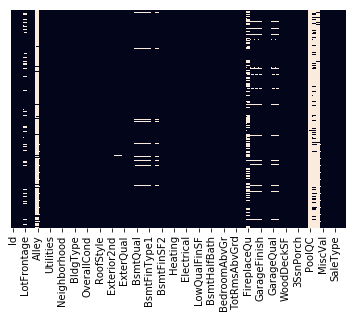

In [117]:
import seaborn as sns
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [118]:
# features to remove, which have more than 50% missing data
remove_features = null_df[null_df['count'] > df_train.shape[0]*0.5].features.tolist()
remove_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [119]:
# remove the columns from the train and test sets
df_train.drop(remove_features, axis=1, inplace=True)
df_test.drop(remove_features, axis=1, inplace=True)

In [120]:
# remove the 'Id'column in both train and test
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [121]:
display(df_train.shape)
display(df_test.shape)

(1460, 76)

(1459, 75)

In [122]:
#df_train.dtypes
# display(check_null(df_train))
# display(check_null(df_test))

In [123]:
#df_train[df_train.isnull().any(axis=1)]
# select the object data types
df_train_obj = df_train.select_dtypes(include=['object']).copy()

# check for missing in object type
#check_null(df_train_obj)
df_train_obj.empty

False

### Fill missing values in train and test sets
### 1. Replace all numeric features with the mean
### 2. Replace all categorical features with the mode

In [124]:
def fill_missing(df):
    df_obj = df.select_dtypes(include=['object']).copy()
    if df_obj.empty==False:
        for col in check_null(df_obj)['features'].tolist():
            df[col] = df[col].fillna(df[col].mode()[0])
    
    df_numeric = df.select_dtypes(include=['int64', 'float64']).copy()
    if df_numeric.empty==False:
        for col in check_null(df_numeric)['features'].tolist():
            df[col] = df[col].fillna(df[col].mean())

In [125]:
fill_missing(df_train)
fill_missing(df_test)

### Check for any missing values in both numeric and categorical columns

In [126]:
check_null(df_train)
check_null(df_test)

,features,count


In [127]:
# for col in check_null(df_train_obj)['features'].tolist():
#     df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [128]:
#df_train['FireplaceQu'].mode()[0]
# check_null(df_train)

In [129]:
# df_train_numeric = df_train.select_dtypes(include=['int64', 'float64']).copy()
# check_null(df_train_numeric)

In [130]:
# for col in check_null(df_train_numeric)['features'].tolist():
#     df_train[col] = df_train[col].fillna(df_train[col].mean())

# # check for any missing values
# check_null(df_train)

In [131]:
# df_train.info()
# print('\n\nFinal training data shape is {}'.format(df_train.shape))

In [132]:
# df_train_obj['MSZoning'].value_counts()
#df_train_obj['MSZoning']

In [133]:
#pd.get_dummies(df_train_obj['MSZoning'], drop_first=True)

### Since there can be sub-categories in test that are not in train, lets combine them together and encode them

### Combine train and test sets before encoding the categorical variables

In [135]:
combined_df = pd.concat([df_train, df_test], axis=0, sort=False, keys=['train', 'test']) # row wise
combined_df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
train 0             60       RL         65.0     8450   Pave      Reg   
      1             20       RL         80.0     9600   Pave      Reg   
      2             60       RL         68.0    11250   Pave      IR1   
      3             70       RL         60.0     9550   Pave      IR1   
      4             60       RL         84.0    14260   Pave      IR1   
...                ...      ...          ...      ...    ...      ...   
test  1454         160       RM         21.0     1936   Pave      Reg   
      1455         160       RM         21.0     1894   Pave      Reg   
      1456          20       RL        160.0    20000   Pave      Reg   
      1457          85       RL         62.0    10441   Pave      Reg   
      1458          60       RL         74.0     9627   Pave      Reg   

           LandContour Utilities LotConfig LandSlope  ... EnclosedPorch  \
train 0            Lvl    AllPub    Inside       Gtl  ...             0   
      1            Lvl    AllPub       FR2       Gtl  ...             0   
      2            Lvl    AllPub    Inside       Gtl  ...             0   
      3            Lvl    AllPub    Corner       Gtl  ...           272   
      4            Lvl    AllPub       FR2       Gtl  ...             0   
...                ...       ...       ...       ...  ...           ...   
test  1454         Lvl    AllPub    Inside       Gtl  ...             0   
      1455         Lvl    AllPub    Inside       Gtl  ...             0   
      1456         Lvl    AllPub    Inside       Gtl  ...             0   
      1457         Lvl    AllPub    Inside       Gtl  ...             0   
      1458         Lvl    AllPub    Inside       Mod  ...             0   

           3SsnPorch ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  \
train 0            0           0        0       0       2    2008        WD   
      1            0           0        0       0       5    2007        WD   
      2            0           0        0       0       9    2008        WD   
      3            0           0        0       0       2    2006        WD   
      4            0           0        0       0      12    2008        WD   
...              ...         ...      ...     ...     ...     ...       ...   
test  1454         0           0        0       0       6    2006        WD   
      1455         0           0        0       0       4    2006        WD   
      1456         0           0        0       0       9    2006        WD   
      1457         0           0        0     700       7    2006        WD   
      1458         0           0        0       0      11    2006        WD   

            SaleCondition SalePrice  
train 0            Normal  208500.0  
      1            Normal  181500.0  
      2            Normal  223500.0  
      3           Abnorml  140000.0  
      4            Normal  250000.0  
...                   ...       ...  
test  1454         Normal       NaN  
      1455        Abnorml       NaN  
      1456        Abnorml       NaN  
      1457         Normal       NaN  
      1458         Normal       NaN  

[2919 rows x 76 columns]

In [136]:
# to get the train and test sets back, use the 'keys'
combined_df.loc['train']
combined_df.loc['test']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


### One hot encoding of the categorical variables

In [158]:
#for col in df_train_obj.columns.tolist():
# Ref: https://pbpython.com/categorical-encoding.html

# df_train_obj_ohe = pd.get_dummies(df_train_obj, columns = df_train_obj.columns.tolist())

# #df_train_obj_ohe
# # drop the columns for which we have encoded from df_train
# cat_cols_drop = df_train_obj.columns.tolist()
# df_train.drop(cat_cols_drop, axis=1, inplace=True)

# df_train_final = pd.concat([df_train, df_train_obj_ohe], axis=1)
# df_train_final

In [137]:
def cat_ohe_multcols(df):
    df_obj = df.select_dtypes(include=['object']).copy()
    columns = df_obj.columns.tolist()
    df_obj_ohe = pd.get_dummies(df, columns= columns, drop_first=True)
    return df_obj_ohe

In [167]:
onehot_df = cat_ohe_multcols(combined_df)
temp = pd.concat([combined_df,onehot_df], axis=1)

# remove the duplicated columns
final_df = temp.loc[:, ~temp.columns.duplicated()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
train 0             60       RL         65.0     8450   Pave      Reg   
      1             20       RL         80.0     9600   Pave      Reg   
      2             60       RL         68.0    11250   Pave      IR1   
      3             70       RL         60.0     9550   Pave      IR1   
      4             60       RL         84.0    14260   Pave      IR1   
...                ...      ...          ...      ...    ...      ...   
test  1454         160       RM         21.0     1936   Pave      Reg   
      1455         160       RM         21.0     1894   Pave      Reg   
      1456          20       RL        160.0    20000   Pave      Reg   
      1457          85       RL         62.0    10441   Pave      Reg   
      1458          60       RL         74.0     9627   Pave      Reg   

           LandContour Utilities LotConfig LandSlope  ... SaleType_ConLw  \
train 0            Lvl    AllPub    Inside       Gtl  ...              0   
      1            Lvl    AllPub       FR2       Gtl  ...              0   
      2            Lvl    AllPub    Inside       Gtl  ...              0   
      3            Lvl    AllPub    Corner       Gtl  ...              0   
      4            Lvl    AllPub       FR2       Gtl  ...              0   
...                ...       ...       ...       ...  ...            ...   
test  1454         Lvl    AllPub    Inside       Gtl  ...              0   
      1455         Lvl    AllPub    Inside       Gtl  ...              0   
      1456         Lvl    AllPub    Inside       Gtl  ...              0   
      1457         Lvl    AllPub    Inside       Gtl  ...              0   
      1458         Lvl    AllPub    Inside       Mod  ...              0   

           SaleType_New SaleType_Oth SaleType_WD SaleCondition_Abnorml  \
train 0               0            0           1                     0   
      1               0            0           1                     0   
      2               0            0           1                     0   
      3               0            0           1                     1   
      4               0            0           1                     0   
...                 ...          ...         ...                   ...   
test  1454            0            0           1                     0   
      1455            0            0           1                     1   
      1456            0            0           1                     1   
      1457            0            0           1                     0   
      1458            0            0           1                     0   

            SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
train 0                         0                     0                     0   
      1                         0                     0                     0   
      2                         0                     0                     0   
      3                         0                     0                     0   
      4                         0                     0                     0   
...                           ...                   ...                   ...   
test  1454                      0                     0                     0   
      1455                      0                     0                     0   
      1456                      0                     0                     0   
      1457                      0                     0                     0   
      1458                      0                     0                     0   

            SaleCondition_Normal SaleCondition_Partial  
train 0                        1                     0  
      1                        1                     0  
      2                        1                     0  
      3                        0                     0  
      4                        1                     0  
...               

In [169]:
final_df['SalePrice']

train  0       208500.0
       1       181500.0
       2       223500.0
       3       140000.0
       4       250000.0
                 ...   
test   1454         NaN
       1455         NaN
       1456         NaN
       1457         NaN
       1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [162]:
final_df.shape

(2919, 276)

In [170]:
# check for duplicate columns
np.unique(final_df.columns.duplicated())

array([False])

### Now that the categorical variables have been 'ohe' get the train and test sets back

In [178]:
df_Train = final_df.loc['train']
df_Test = final_df.loc['test']

In [174]:
df_Train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0


In [173]:
# check if there any columns of obj type
display(df_Train.info())
display(df_Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 276 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(12), int64(25), uint8(239)
memory usage: 774.2 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 276 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(12), int64(25), uint8(239)
memory usage: 773.7 KB


None

In [142]:
#final_df.select_dtypes(include=['int64', 'float64'])

In [179]:
# drop 'SalesPrice' from df_Test, which we need to predict
df_Test.drop(['SalePrice'], axis=1, inplace=True)

In [180]:
# Train
X_train = df_Train.drop(['SalePrice'], axis=1)
y_train = df_Train['SalePrice']

## Prediction using ML algorithms

In [181]:
import xgboost
xgbReg = xgboost.XGBRegressor()
xgbReg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [182]:
#prediction
y_pred = xgbReg.predict(df_Test)

In [183]:
y_pred

array([126834.37, 151563.48, 175700.83, ..., 173427.53, 107865.2 ,
       217077.7 ], dtype=float32)

In [191]:
# create a sample submission
submission_temp = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
pred_df = pd.DataFrame(y_pred)
submission = pd.concat([submission_temp['Id'], pred_df], axis=1)
submission.columns=['Id', 'SalePrice']
submission.to_csv('submission.csv', index=False)